<a href="https://colab.research.google.com/github/rassamyjs/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/week_3_assignment_3High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


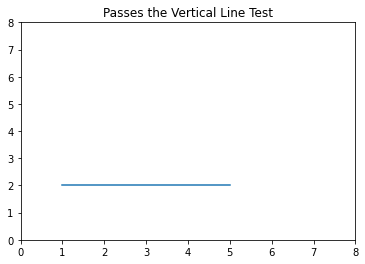

In [9]:
# graph that passes the vertical line test
a = [1, 2, 3, 4, 5]
b = [2, 2, 2, 2, 2]
plt.plot(a, b)
plt.xlim(0,8)
plt.ylim(0,8)
plt.title('Passes The Vertical Line Test')
plt.show()

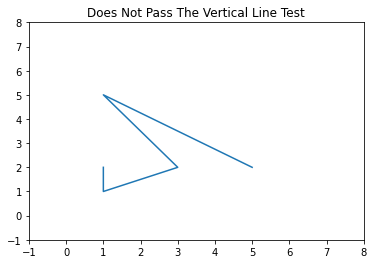

In [15]:
# graph that does not pass the vertical line test
a = [1, 1, 3, 1, 5]
b = [2, 1, 2, 5, 2]
plt.plot(a, b)
plt.xlim(-1,8)
plt.ylim(-1,8)
plt.title('Does Not Pass The Vertical Line Test')
plt.show()


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

You should be to put 1 value into the function and have 1 value come out to be able to be called a function

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only relation 2 can be considered a function. Relation 2 would pass the vertical line test according to graphs on 1.1. The reason is the x-values do not overlap. The other relations have overlapping x-values. 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

First funtion would have 3 inputs = 3 output
second funtion would have 4 inputs = 2 outputs

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [ ]:
# r2 unit vector
[x1,x2] = x1[1,0] + x2[0,1]
p([1,0]) = [1,3]
p([0,1]) = [-1,2]
T = [[1,3],[-1,2]]

# r3 unit vector
[x1,x2,x3] = x1[1,0,0] + x2[0,1,0] + x3[0,0,1]
q([1,0,0]) = [4,1,2]
q([0,1,0]) = [-1,2,3]
q([0,0,1]) = [5,1,-2]

T = [[]]

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvector is a transformation of a vector that does not move it from its original direction **ex** an earth spins one way 
Eigenvalues is the scalar that is goes along with whatever eigenvector is picked and how it was scaled during the transformation **ex** the closer to the globe pole would give smaller values than farther out. The north poles eigenvalue would be smaller than the value out in South America.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Using higher specs might be a waste of time, energy, resourses, money if the use of higher specs don't show relevent data. **ex** No point looking at a line or scatter graph on a 3d graph.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You would want 5 times the number of rows per columns

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [106]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)


(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [ ]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

In [ ]:
# check for null values
national.isnull().sum().any()

In [ ]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

In [ ]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

In [ ]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

In [ ]:
# Now we only have numeric columns (ints and floats)
national_processed.dtypes

In [ ]:
national_processed

In [35]:
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
### Your Code Here
#using PCA
#drop some columns until 5 or so is left
#national_processed.drop(national_processed.columns[[6,7]], axis=1, inplace=True)
national_processed
X = national_processed
X

In [114]:
#using PCA libary 
X
scaler = StandardScaler()
Z = scaler.fit_transform(X)
pca = PCA()
pca.fit(Z)
B = pca.fit_transform(Z)
print("\n Projected data: \n", B)

#change back to data fram
B1 = pd.DataFrame(B)
B1


 Projected data: 
 [[-0.87582061 -0.28600308 -2.25081603  0.51173441  0.2335058   0.04850266]
 [ 0.40296202 -0.57444856 -1.72035555 -0.91339355 -0.5645709   0.01822617]
 [-1.04523141 -0.72815834 -1.79910651 -0.07367481 -0.52049409  0.01015038]
 ...
 [ 2.13059851  0.43973247  2.03385722  1.01081149  0.37458112 -0.26119   ]
 [-0.65277483  0.11463673  2.24279484 -0.05442151  0.18076374  0.08707036]
 [-2.99395565  2.29334699  0.05219967 -0.41350304  0.20552111  0.12125151]]


,0,1,2,3,4,5
0,-0.875821,-0.286003,-2.250816,0.511734,0.233506,0.048503
1,0.402962,-0.574449,-1.720356,-0.913394,-0.564571,0.018226
2,-1.045231,-0.728158,-1.799107,-0.073675,-0.520494,0.010150
3,-1.312183,-0.746490,-1.770547,-0.251311,-0.182002,0.030385
4,-1.013329,-0.812881,-1.637413,-0.576627,-0.016144,0.037339
...,...,...,...,...,...,...
64530,-2.135448,0.142218,2.189507,-0.848181,-0.019438,0.085230
64531,2.338994,1.162534,1.640202,-1.142566,0.203959,-0.083093
64532,2.130599,0.439732,2.033857,1.010811,0.374581,-0.261190
64533,-0.652775,0.114637,2.242795,-0.054422,0.180764,0.087070


In [117]:
national_processed


,CONTROL,L50,L80,IPOV,BUILT,ABLMED
0,0,26213,40322,11067,2006,66364.20
1,1,28604,45744,24218,1980,64781.36
2,2,22897,36614,15470,1985,64781.36
3,3,22897,36614,13964,1985,58079.84
4,4,24628,39421,15492,1980,54891.90
...,...,...,...,...,...,...
64530,64530,21525,34414,12019,1930,41946.75
64531,64531,39750,63650,28229,1950,66240.00
64532,64532,39200,62650,15517,1940,89752.00
64533,64533,28577,43494,12055,1930,59744.25


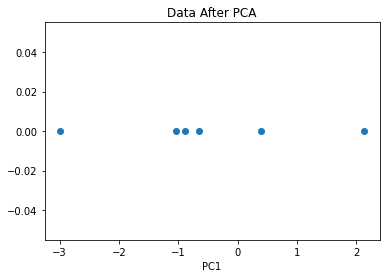

In [116]:
# scatter plot comparison of first 3 and last 3 rows after
x = [-0.879, 0.403, -1.045, 2.135, -0.653, -2.993]
y = [0, 0, 0, 0, 0, 0]

data = {"x": x, "y": y}
df = pd.DataFrame(data)
plt.scatter(df['x'], df['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

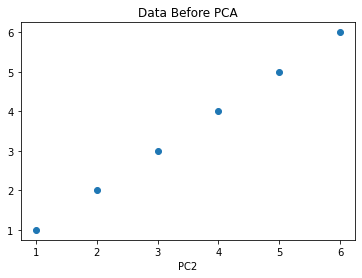

In [120]:
# scatter plot comparison of first 3 and last 3 rows before
x = [1,2,3,4,5,6]
y = [1,2,3,4,5,6]
data = {"x": x, "y": y}
df = pd.DataFrame(data)
plt.scatter(df['x'], df['y'])
plt.title("Data Before PCA")
plt.xlabel('PC2')
plt.show()

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)